In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Admission_predict_ver1.csv')
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit   
0           1    

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
from sklearn.utils import shuffle
df_shuffled = shuffle(df,random_state = 42)
df_shuffled.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
361,362,334,116,4,4.0,3.5,9.54,1,0.93
73,74,314,108,4,4.5,4.0,9.04,1,0.84
374,375,315,105,2,2.0,2.5,7.65,0,0.39
155,156,312,109,3,3.0,3.0,8.69,0,0.77
104,105,326,112,3,3.5,3.0,9.05,1,0.74


In [7]:
DV = 'Chance of Admit '

In [8]:
x= df_shuffled.drop(['Chance of Admit ','Serial No.'],axis=1)
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1


In [9]:
y=df_shuffled[DV]
y.head()

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
Name: Chance of Admit , dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=x_tr_scaled.shape[1])
pca.fit(x_tr_scaled)
ratios = pca.explained_variance_ratio_

In [13]:
for i in range(np.cumsum(ratios).shape[0]):
  if np.cumsum(ratios)[i] >= 0.99:
    num_pca = i + 1
    print("The optimal number of PCA's is: {}".format(num_pca))
    break
  else:
    continue

The optimal number of PCA's is: 7


In [14]:
pca = PCA(n_components=7)
x = pca.fit_transform(x)

In [15]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(pca.singular_values_)

[9.29867063e-01 5.76314716e-02 7.07779605e-03 2.37674260e-03
 1.62317908e-03 9.78376087e-04 4.45371526e-04]
[279.47266437  69.57588795  24.38248271  14.12927825  11.67648488
   9.06529242   6.11631898]


In [16]:
from sklearn.linear_model import LinearRegression
mlr= LinearRegression()
mlr.fit(x_tr,y_tr)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
Y_pred = mlr.predict(x_te)
mse= mean_squared_error(y_te,Y_pred)
rmse=np.sqrt(mse)
print("Mean squared error:",mse)
print("Mean absolute error:",mean_absolute_error(y_te,Y_pred))
print("Root mean squared error:",np.sqrt(mse))
print("R-Square:",r2_score(y_te,Y_pred)*100)

Mean squared error: 0.003342752732649246
Mean absolute error: 0.041104462845656185
Root mean squared error: 0.057816543762570644
R-Square: 80.74119498003454


In [18]:
accuracy= mlr.score(x_te,y_te)
print("Accuracy:",accuracy)

Accuracy: 0.8074119498003454


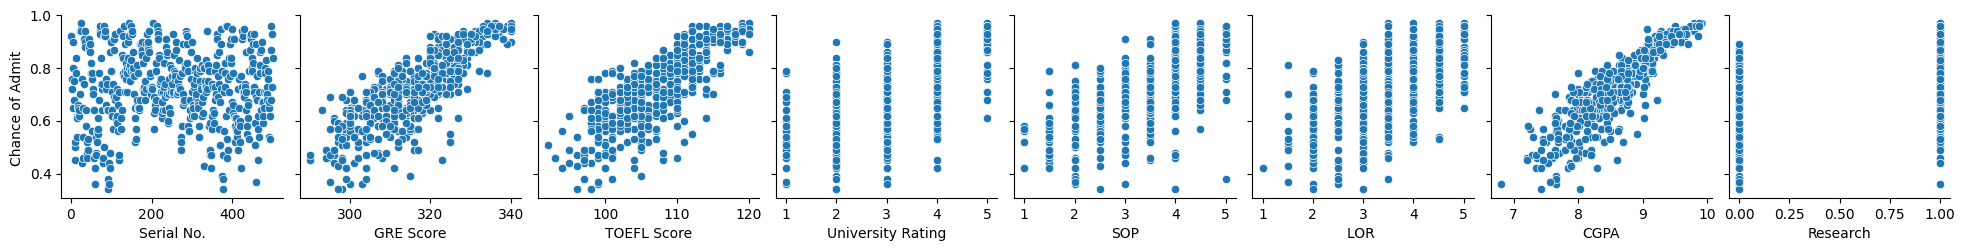

In [20]:
sns.pairplot(df,x_vars=['Serial No.','GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'],y_vars=['Chance of Admit '])
mlt.show()

In [21]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


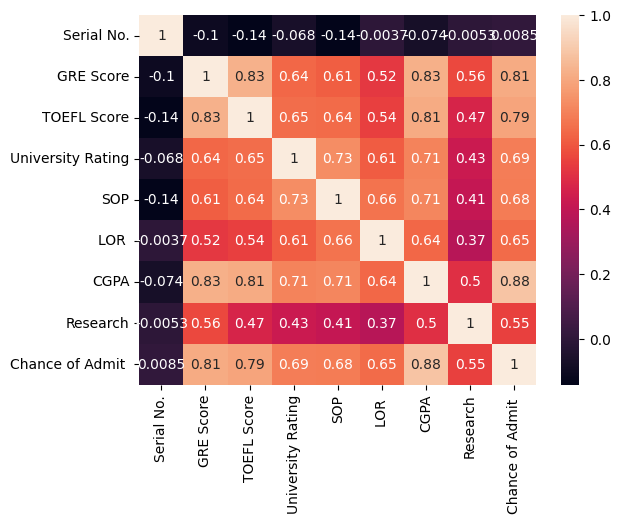

In [22]:
corrMatrix=df.corr()
sns.heatmap(corrMatrix,annot=True)
mlt.show()

In [23]:
mlr_df= pd.DataFrame({'Actual':np.array(y_te),'Predicted':Y_pred})

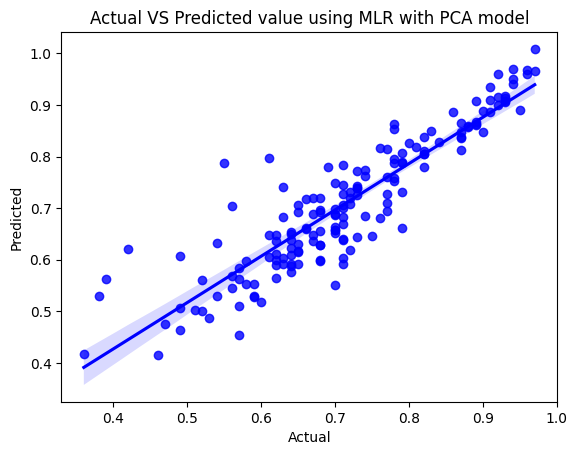

In [24]:
sns.regplot(mlr_df['Actual'],mlr_df['Predicted'],fit_reg=True,color='blue')
mlt.title('Actual VS Predicted value using MLR with PCA model')
mlt.show()